In [1]:
#importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import sweetviz as sv

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('players_20.csv')
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


# Business Case

Football is one of the most popular sports globally, played by millions and watched by even more. The objective of football is simple: to outscore the opponent within a 90-minute match, split into two halves. Each team fields 11 players, including one goalkeeper and ten outfield players, who work together to attack, defend, and control the game. The players primarily use their feet to move the ball, while only the goalkeeper, confined to the 18-yard box, can use their hands.

To excel in football, players must develop a range of essential skills. These include dribbling, passing, shooting, defending, heading the ball, ball juggling, and being adept with both feet. Mastering these abilities is crucial for becoming a professional footballer. Additionally, understanding the strengths and weaknesses of the opposing team’s players is vital for devising effective strategies and enhancing a team's chances of winning.

FIFA 20, a football simulation video game published by Electronic Arts (EA), reflects these nuances. It is part of the renowned FIFA series and includes comprehensive player data, sourced from **SoFIFA**, a popular database and forum for FIFA enthusiasts. SoFIFA provides in-depth information about each player in the FIFA Career Mode, including attributes such as full name, age, height, weight, preferred playing positions, and detailed ratings for various skills like dribbling, goalkeeping, passing, and mental strength. 

This data also includes overall ratings, rankings by position, and other statistics that can be used to assess and compare players. By leveraging this rich dataset, we can analyze and cluster players based on their skills and attributes, providing insights into their performance and potential for improvement. This clustering can help teams make informed decisions in player scouting, development, and game strategy planning.

# Domain Analysis

- sofifa_id : sofifa_id is a unique identifier for each player.



- player_url : player_url is the URL linking to a player's SOFIFA profile page.



- short_name : shortened version of a player's name.


- long_name : full name of a player.


- age : player's age

 - dob : date of birth

- height_cm : player's height(cm)

- weight_kg : player's weight(kg)

- nationality : player's nationality

- club : player's current club, there are 718 clubs

- overall : overall player rating(0-100)

- potential : represents a player's projected future ability(0-100)

- value_eur : represents a player's estimated market value in euros
    
 Highest market value: 150,000,000 Euros (top players)     
 Lowest market value: 0 Euros (free agents or low-rated players)      
 Average market value: 4,300,000 Euros    



- wage_eur : represents a player's weekly salary
    
Highest weekly wage: 725,000 Euros (top players)     
Lowest weekly wage: 1,500 Euros (lower-league players)     
Average weekly wage: 43,000 Euros    



- player_positions : positions a player can play
    
1. Strikers (ST, RS, LS)
    - Attack and score goals
    - Ball control, shooting, and finishing skills
2. Center Forwards (CF)
    - Receive balls and score assists or goals
    - Passing skills in addition to striker skills
3. Right/Left Forwards (RF, LF)
    - Same expectations as center forwards
4. Wingers (RW, LW)
    - Create chances from the sides
    - Dribbling, acceleration, passing, and crossing skills


- preferred_foot :  represents the player's dominant or preferred foot, which affects their in-game performance.

- international_reputation :  represents a player's recognition and prestige globally. It's a numerical value (0-5) indicating their international stature:



- weak_foot : refers to a player's ability to control and use their non-dominant foot(0-5).



- skill_moves : represents a player's ability to perform advanced dribbling techniques(0-5).


- work_rate : represents a player's defensive and attacking effort.



- body_type : " represents a player's physical characteristics.



- real_face : indicates whether a player's likeness is accurately represented in-game.


- release_clause_eur : column represents the minimum amount of money (in Euros) that a club must pay to release a player from their contract.



- player_tags :  refer to attributes that highlight a player's unique skills or playing style.


- team_position : refers to a player's preferred position within a team's formation.



- team_jersey_number : Unique identifier for each player on the team(0-99).

- loaned_from : indicates the team that a player is loaned from, if applicable.

The team that owns the player's contract, but has temporarily transferred them to another team.



- joined :  refers to the date or season when a player joined their current team.



- contract_valid_until :  indicates the expiration date of a player's contract with their current team.


- nation_position : refers to a player's position within their national team.



- nation_jersey_number : refers to the number on a player's jersey when representing their national team.


- pace : pace represents a player's speed and acceleration on the pitch.

0-99 (higher values indicate better pace)



- shooting : represents a player's ability to score goals.


- passing : represents a player's ability to distribute the ball effectively.

- dribbling : represents a player's ability to beat opponents with the ball.



- defending : :represents a player's ability to defend against opponents.

- physic : represents a player's physical attributes.

#### Goal Keeper Atrributes :

- gk_handling : Measures a goalkeeper's ability to catch and hold onto the ball.   
- gk_diving : Measures a goalkeeper's agility and reaction time when diving for the ball.   
- gk_kicking : Measures a goalkeeper's ability to distribute the ball with accuracy.   
- gk_reflexes : Measures a goalkeeper's reaction time and ability to make quick saves.   
- gk_speed : Measures a goalkeeper's mobility and ability to cover the goal.   
- gk_positioning : Measures a goalkeeper's ability to anticipate and position themselves for saves.













- player_traits : "player_traits" refer to unique characteristics or skills that enhance a player's performance on the pitch.



#### Attacking Attributes : 

- attacking_crossing: Measures a player's ability to deliver accurate crosses into the box(1-99).    
- attacking_finishing: Measures a player's ability to score goals with precision.   
- attacking_heading_accuracy: Measures a player's ability to score headers.   
- attacking_shoot_passing: Measures a player's ability to create scoring chances with passes.   
- attacking_volleys: Measures a player's ability to score with volleys.

  


   

   



#### Skill Atrributes : 

- skill_dribbling: Measures a player's ability to beat opponents with the ball(1-99).   
- skill_curve: Measures a player's ability to bend shots and passes.    
- skill_fk_accuracy: Measures a player's ability to score from free kicks.   
- skill_long_passing: Measures a player's ability to complete long passes.   
- skill_ball_control: Measures a player's ability to control the ball.










#### Movement Atrributes : 

- movement_acceleration: Measures a player's ability to quickly gain speed.   
- movement_sprint_speed: Measures a player's top-end speed.   
- movement_agility: Measures a player's ability to quickly change direction.   
- movement_reactions: Measures a player's ability to react to situations.   
- movement_balance: Measures a player's ability to maintain balance.













#### Power Attributes :

- power_shot_power: Measures a player's ability to hit powerful shots.    
- power_jumping: Measures a player's ability to win aerial battles.   
- power_stamina: Measures a player's endurance and energy levels.    
- power_strength: Measures a player's physicality and ability to win challenges.    
- power_long_shots: Measures a player's ability to score from distance.












#### Mentality Atrributes : 

- mentality_aggression: Measures a player's willingness to win the ball.    
- mentality_interceptions: Measures a player's ability to anticipate passes.   
- mentality_positioning: Measures a player's spatial awareness.   
- mentality_vision: Measures a player's ability to read the game.   
- mentality_penalties: Measures a player's composure in high-pressure situations.    
- mentality_composure: Measures a player's calmness under pressure.















#### Defending Attributes :

- defending_marking: Measures a player's ability to track opponents.   
- defending_standing_tackle: Measures a player's ability to win the ball without sliding.   
- defending_sliding_tackle: Measures a player's ability to win the ball with slides.








#### GoalKeeping Attributes : 

- goalkeeping_diving: Measures a goalkeeper's ability to make spectacular saves.   
- goalkeeping_handling: Measures a goalkeeper's ability to catch and hold onto the ball.   
- goalkeeping_kicking: Measures a goalkeeper's ability to distribute the ball.    
- goalkeeping_positioning: Measures a goalkeeper's ability to anticipate and position themselves.   
- goalkeeping_reflexes: Measures a goalkeeper's reaction time and ability to make quick saves.





- LS (Left Striker), ST (Striker), RS (Right Striker), LW (Left Winger), LF (Left Forward), CF (Centre Forward), RF (Right Forward), RW (Right Winger), LAM (Left Attacking Midfielder), CAM (Central Attacking Midfielder), RAM (Right Attacking Midfielder), LM (Left Midfielder), LCM (Left Central Midfielder), CM (Central Midfielder), RCM (Right Central Midfielder), RM (Right Midfielder), LWB (Left Wing Back), LDM (Left Defensive Midfielder), CDM (Central Defensive Midfielder), RDM (Right Defensive Midfielder), RWB (Right Wing Back), LB (Left Back), LCB (Left Centre Back), CB (Centre Back), RCB (Right Centre Back), RB (Right Back) represents positional ratings of the players. The values in these columns (e.g., 89+2) represent a player's *Base Rating* (core skill level) and *Chemistry Boost*, which enhances their effective performance in that position.

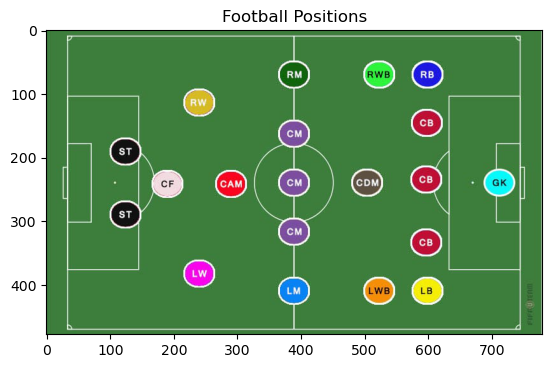

In [4]:
img = mpimg.imread('football positions.jpg')
plt.imshow(img)
plt.title('Football Positions')
plt.show()

# Basic Checks

In [5]:
print("The number of rows in the dataset are:", df.shape[0])
print("The number of columns in the dataset are:", df.shape[1])


The number of rows in the dataset are: 18278
The number of columns in the dataset are: 104


In [6]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [7]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [8]:
df.describe(include = 'O')

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,...,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,...,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,...,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,...,682,636,636,636,682,667,621,621,621,667


In [9]:
#dropping some useless columns

In [10]:
df.drop(['sofifa_id','short_name', 'player_url', 'long_name', 'dob',], axis = 1, inplace = True)
df

,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 99 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   nationality                 18278 non-null  object 
 4   club                        18278 non-null  object 
 5   overall                     18278 non-null  int64  
 6   potential                   18278 non-null  int64  
 7   value_eur                   18278 non-null  int64  
 8   wage_eur                    18278 non-null  int64  
 9   player_positions            18278 non-null  object 
 10  preferred_foot              18278 non-null  object 
 11  international_reputation    18278 non-null  int64  
 12  weak_foot                   18278 non-null  int64  
 13  skill_moves                 182

- 16 columns are of datatype float
- 44 columns are of datatype integer
- 39 columns are of datatype object

In [12]:
num_cols = df.select_dtypes(include=['float64','int64']).columns             #numerical columns
num_cols

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'team_jersey_number', 'contract_valid_until',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_visio

In [13]:
num_cols.shape

(60,)

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns        #categorical columns
cat_cols

Index(['nationality', 'club', 'player_positions', 'preferred_foot',
       'work_rate', 'body_type', 'real_face', 'player_tags', 'team_position',
       'loaned_from', 'joined', 'nation_position', 'player_traits', 'ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb'],
      dtype='object')

In [15]:
cat_cols.shape

(39,)

- We identified 26 columns in the dataset that contain player position data formatted with a plus sign(eg., "89+3").    
This format is treated as categorical due to the non numeric character.

- So we Split the values at the plus sign and Sum the resulting numbers to convert them into a single numerical value.

In [16]:
# List of columns
columns_to_process = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 
                      'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 
                      'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 
                      'lcb', 'cb', 'rcb', 'rb']

# Function to split and sum
def split_and_sum(val):
    if isinstance(val, str) and "+" in val:
        parts = val.split("+")
        return int(parts[0]) + int(parts[1])  # Split at '+', convert to int, and sum
    elif isinstance(val, (int, float)):  # If it's already a number
        return val
    else:
        return None  # Handle NaN or other unexpected formats

# Applying the function to all specified columns
for col in columns_to_process:
    df[col] = df[col].apply(split_and_sum)

In [17]:
df.head()

,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",...,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
1,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",...,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",...,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0
3,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",...,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0


In [18]:
num_cols1= df.select_dtypes(include=['float64','int64']).columns             #numerical columns
num_cols1

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'team_jersey_number', 'contract_valid_until',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_visio

In [19]:
num_cols1.shape

(86,)

In [20]:
cat_cols1 = df.select_dtypes(include=['object']).columns
cat_cols1

Index(['nationality', 'club', 'player_positions', 'preferred_foot',
       'work_rate', 'body_type', 'real_face', 'player_tags', 'team_position',
       'loaned_from', 'joined', 'nation_position', 'player_traits'],
      dtype='object')

In [21]:
cat_cols1.shape

(13,)

# Eploratory Data Analysis

- Univariate Analysis

In [22]:
#importing Sweetviz

In [23]:
report  = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [24]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


###### Univariate Analysis Insights :

-  Football's prime age range is 20-30, showing that players thrive in this period where experience meets peak physical performance.   
-  Height between 175 cm and 185 cm dominates, revealing the perfect balance between agility and physicality in modern football.   
-  Most players weigh between 70-80 kg, illustrating the ideal balance of speed, strength, and stamina needed for top-tier performance.   
-  England leads in football talent, contributing 9% of players, followed by Germany and Brazil, reinforcing the dominance of traditional footballing nations.    
-  Players from Barcelona, Real Valladolid, and other elite clubs continue to dominate, highlighting the concentration of top talent in a few prestigious teams.    
-  While most player ratings fall between 65 and 75, only a few reach the elite category, with the highest rating at 94, reflecting the gap between good and world-class players.   
-  The majority of players have a potential rating clustered around 65-75, indicating many are on the verge of breaking into higher levels of performance.   
-  The vast wage gap, with a skewed distribution, shows that football's financial rewards are reserved for a select few while the majority earn modest sums.   
-  Pace, an essential asset in modern football, sees most players in the 65-75 range, with a few exceptional athletes reaching top speeds up to 96.   
-  Shooting and dribbling skills are mostly concentrated between 50-70, yet elite attackers set themselves apart with peak values close to 100.   
-  13% of players are center-backs, while strikers (10%) and goalkeepers (11%) dominate the key positions, showing the tactical emphasis on defense and goal-scoring.   
-  Right-footed players dominate the field, with left-footed players being a rare commodity, making them tactically unique.   
-  International reputation remains limited, with 92% of players having a rating of 1, underscoring the rarity of global football icons.   
-  Players with a "normal" body type (59%) and "lean" (36%) showcase the preferred physiques, balancing endurance and agility across the pitch.   
-  Clubs are willing to invest heavily, as seen in the inflated player values, where the maximum reaches €105.5 million, signaling football’s lucrative nature.   
-  Footballers’ release clauses show dramatic variation, with high skewness, reflecting the intense competition and the need to lock in top talent.   
-  Dribbling skill is a key attribute, with players showcasing a wide range from 23 to 96, indicating a mix of both technical masters and less skilled players.   
-  Defending is slightly skewed towards a higher skill range, with most defenders excelling between 65-70, while elite defenders push into the 80s and 90s.   
-  Physical strength, maxing out at 90, highlights that while raw power is critical, only a few players dominate physically, making strength a niche asset.   
-  The spread of player heights, weights, and body types reveals how diverse physical builds contribute to varied tactical roles, from nimble wingers to towering defenders.   




- Bivariate Analysis

###### Overall rating vs Monetary Features

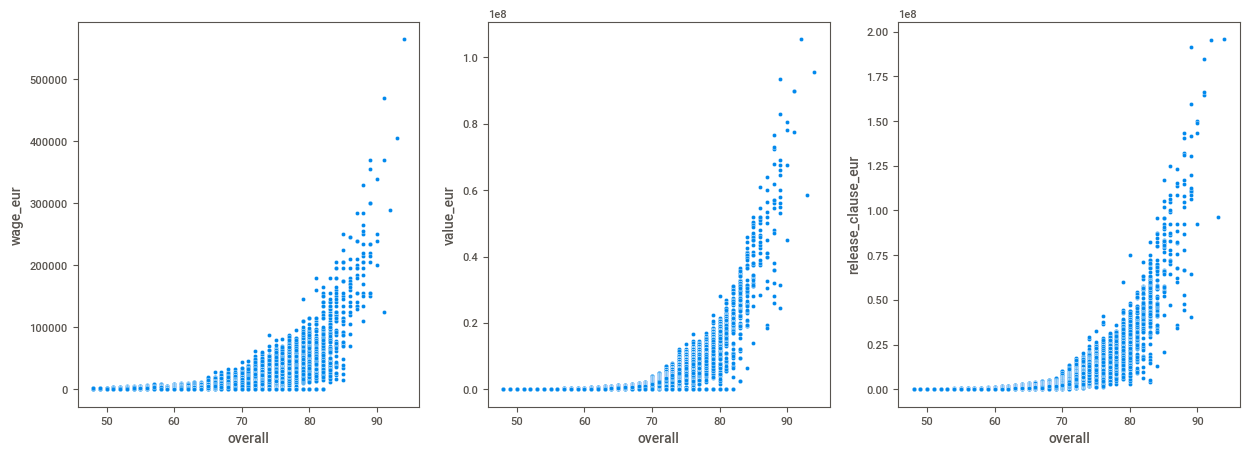

In [25]:
plt.figure(figsize=(15,5))
index = 1

bivariate_columns = ['wage_eur','value_eur','release_clause_eur']

for i in bivariate_columns:
        plt.subplot(1,3,index)
        sns.scatterplot(x='overall',y = i, data = df)
        index +=1
plt.show()

###### inisghts : 

- As overall ranking rises, wage, value and release clause value also increases

In [26]:
# height vs skills

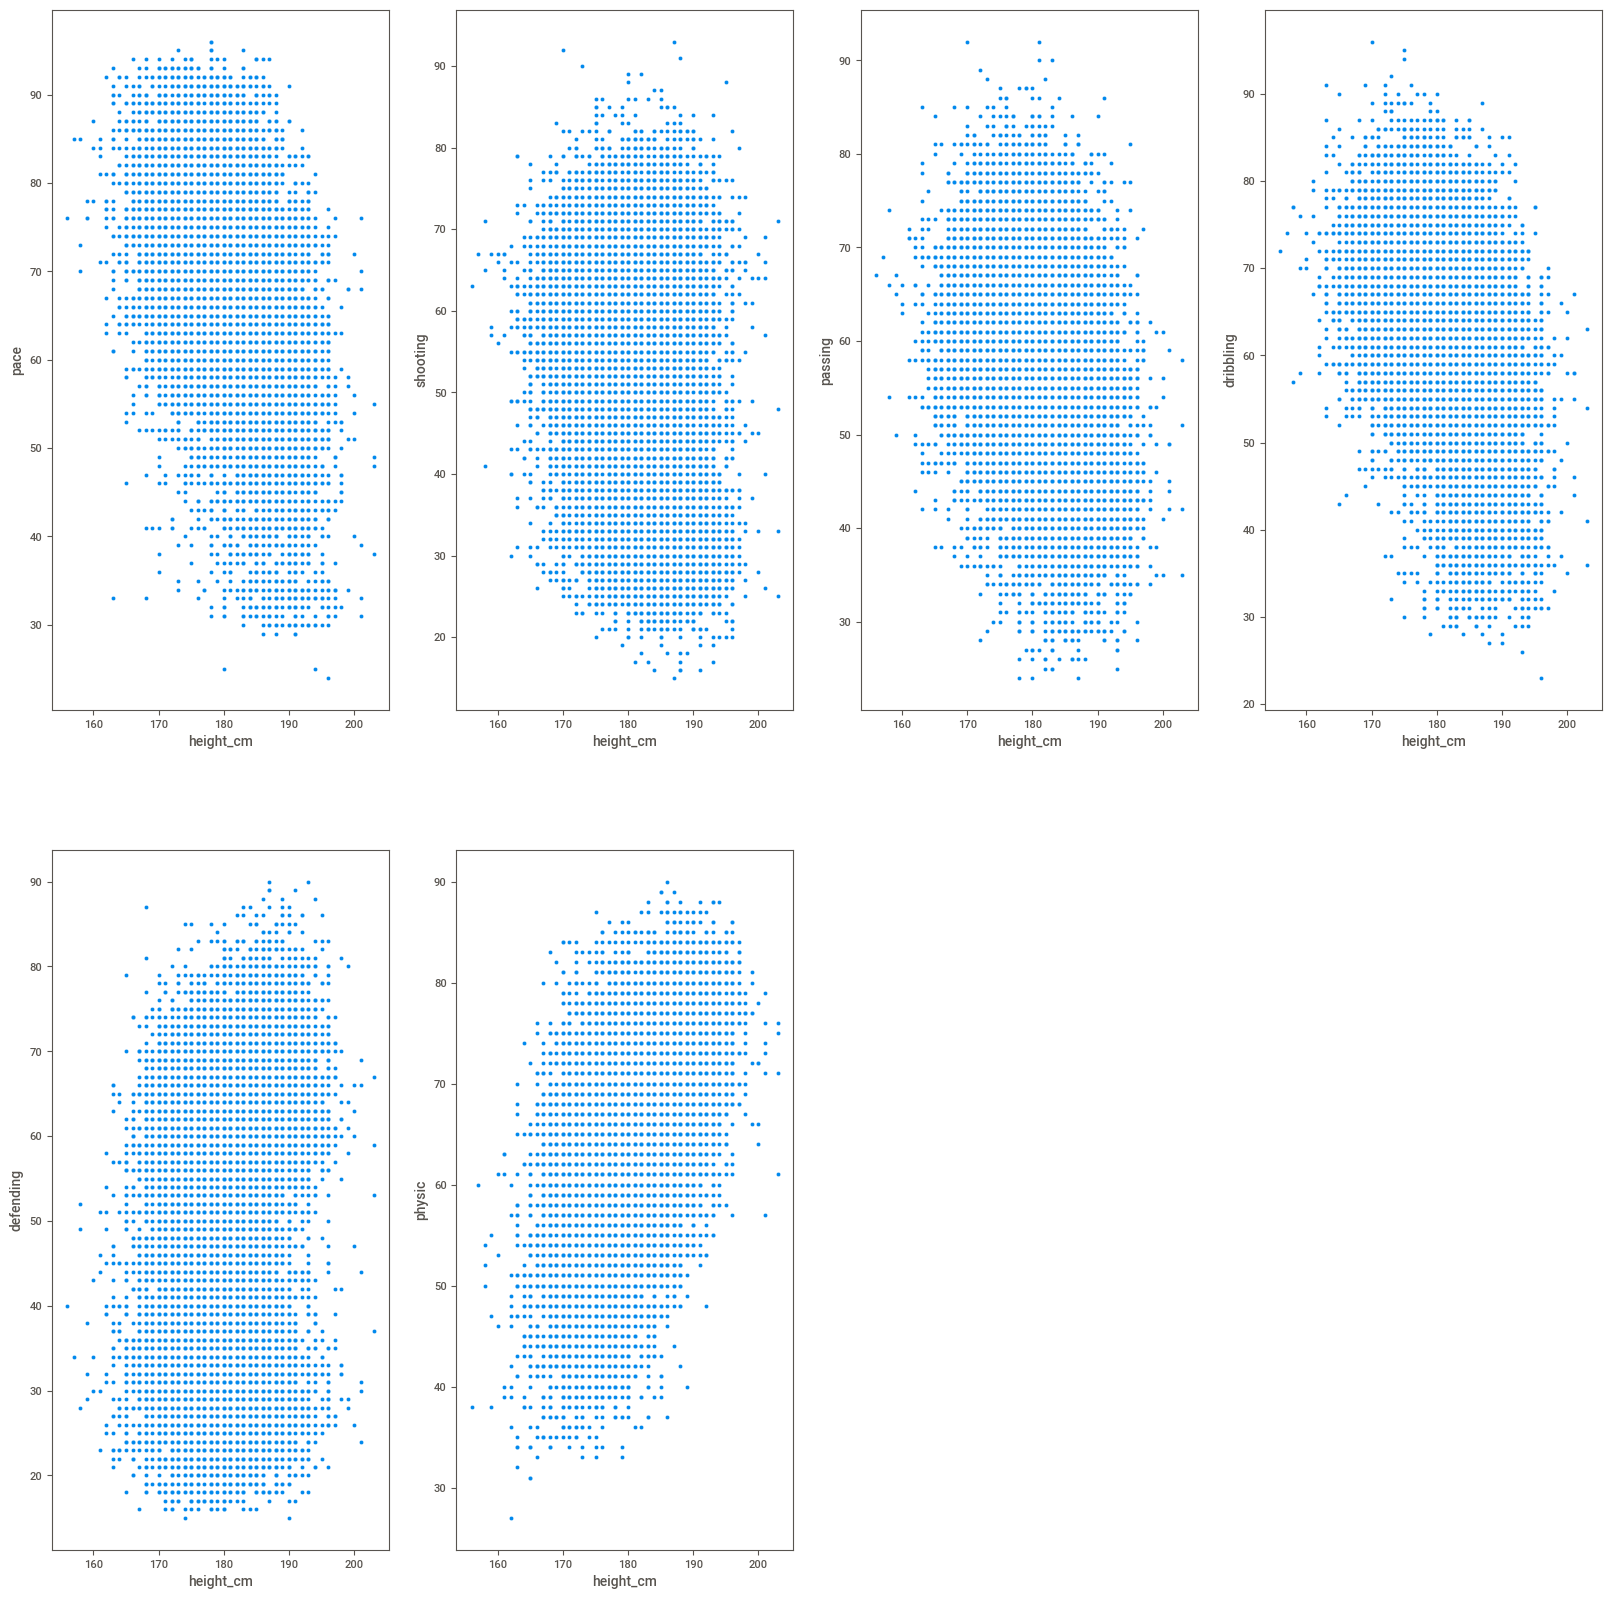

In [27]:
plt.figure(figsize=(20,20))
index = 1

skill_columns = ['pace', 'shooting', 'passing', 'dribbling','defending', 'physic']

for i in skill_columns:
        plt.subplot(2,4,index)
        sns.scatterplot(x='height_cm',y = i, data = df)
        index +=1
plt.show()

###### insights :

- Shorter players tend to have higher pace, making them quicker and more agile on the field.   
- Taller players excel in shooting, especially in aerial duels and heading.   
- Height is strongly correlated with defending ability, with taller players dominating defensive roles.   
- Shorter players are more proficient at dribbling, benefiting from a lower center of gravity for quick movements.   
- Taller players have better physicality, giving them an advantage in strength and stamina during duels.    

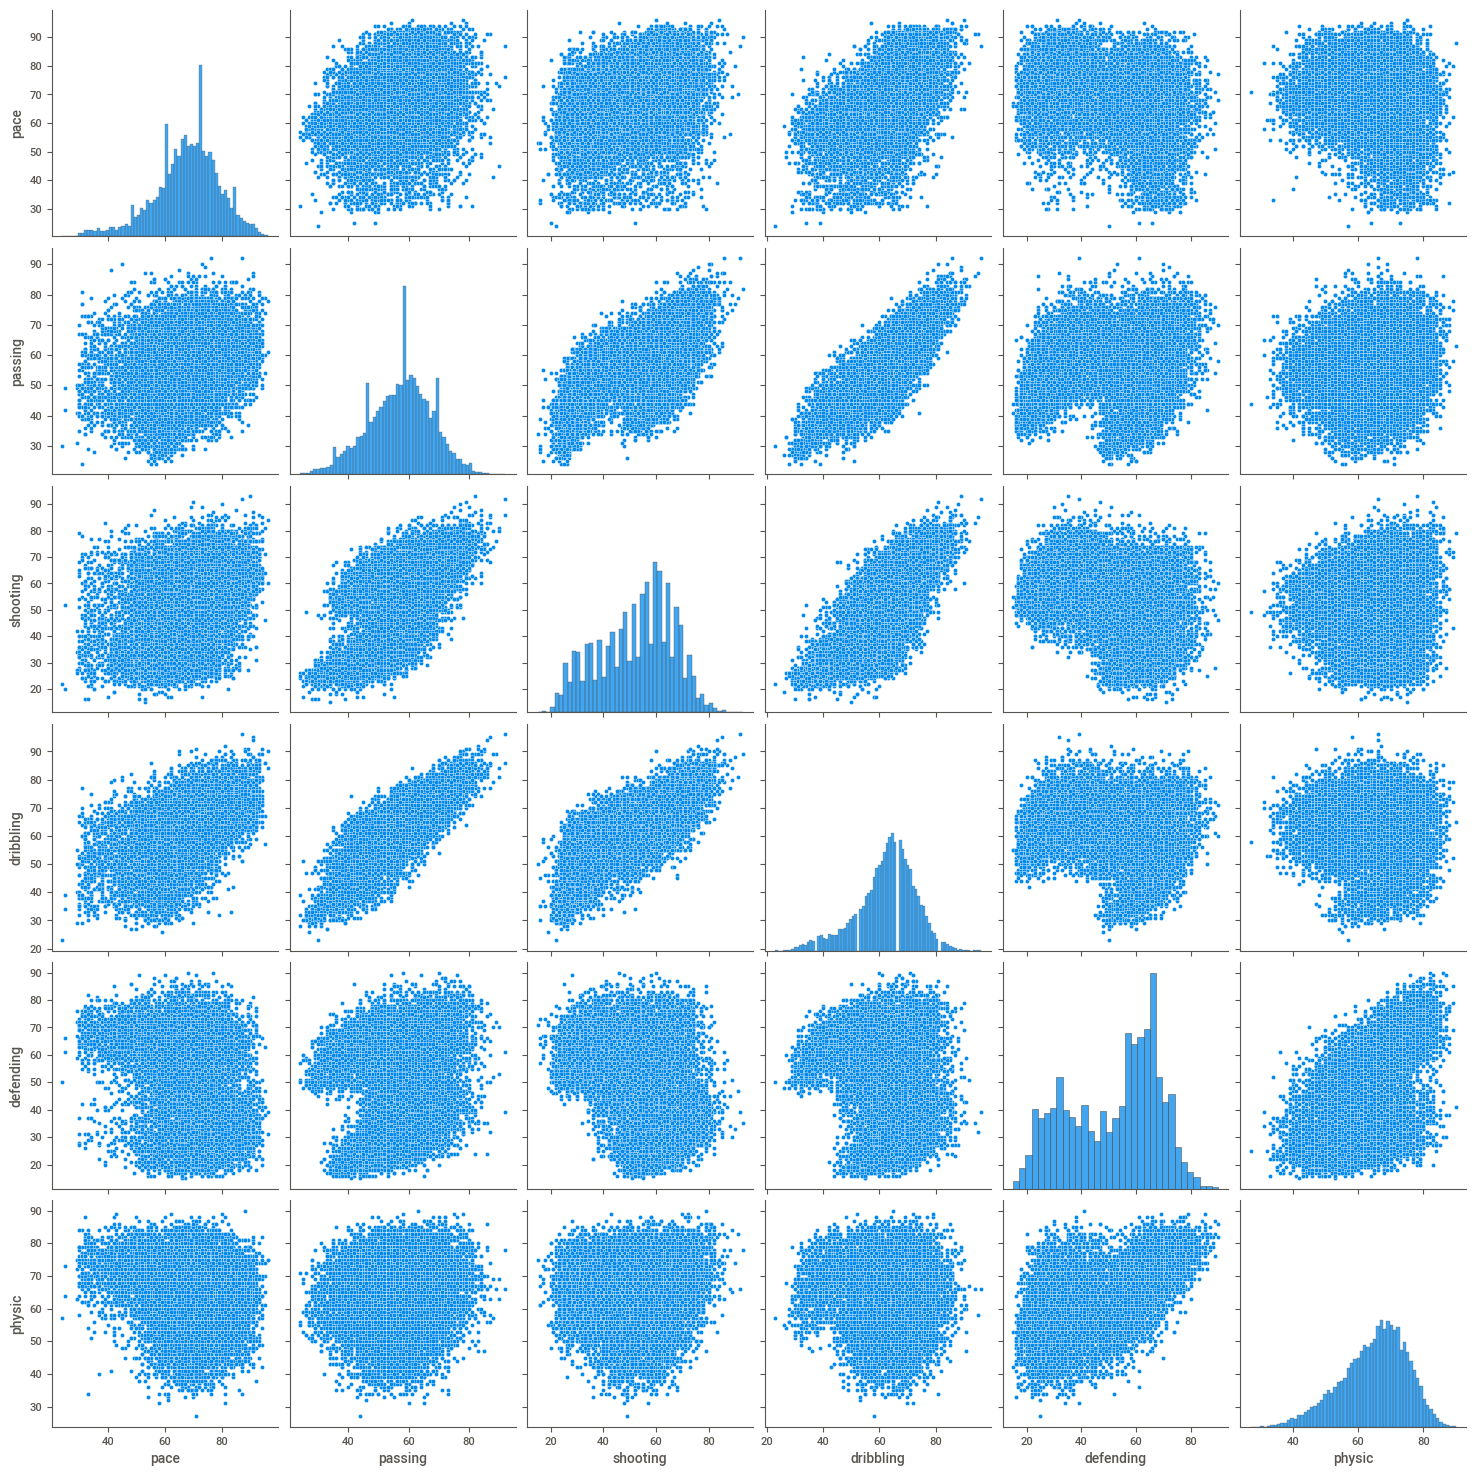

In [28]:
skills = df[['pace','passing','shooting','dribbling','defending','physic']]
sns.pairplot(skills)
plt.show()

###### insights :

- Players with higher Pace often have higher Dribbling, indicating that fast players tend to be more agile.   
- Shooting and Passing skills seem positively correlated, suggesting that strong attackers tend to also have good playmaking abilities.   
- Defending and Physic are closely related, meaning that strong players tend to excel in defense.   
- Outliers show that some players with exceptional Pace may not necessarily have high Physic, indicating fast but less physically strong players.

##### Task 1 : Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

In [29]:
country_counts = df.nationality.value_counts()

In [30]:
top_10_countries = country_counts.head(10)
top_10_countries

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64

In [31]:
top_10_df = top_10_countries.reset_index()

In [32]:
top_10_df.columns = ['country','No of Players']

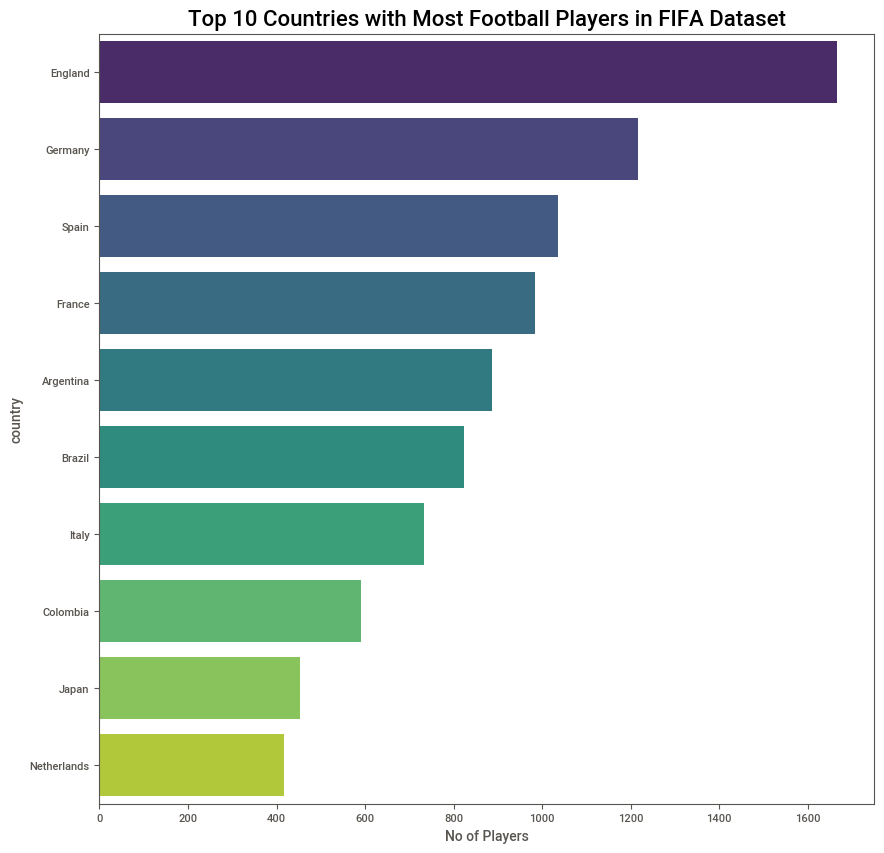

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(x='No of Players',y ='country', data = top_10_df, palette = 'viridis')
plt.title('Top 10 Countries with Most Football Players in FIFA Dataset', fontsize = 16)
plt.show()

- The bar graph illustrates that **England** leads in football talent production with 1,667 players, followed by *Germany* with *1,216* and *Spain* with *1,035. *France* (984) and *Argentina* (886) also contribute significantly, while *Brazil* (824) maintains its football heritage. Other notable countries include *Italy* (732), *Colombia* (592), *Japan* (453), and the *Netherlands* (416). This ranking highlights the countries most prolific in producing top-level footballers.



##### Task 2 : Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

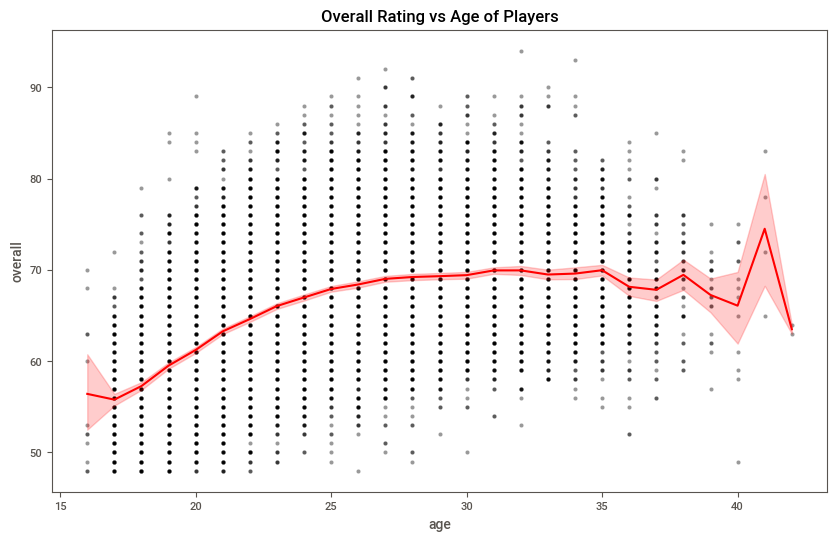

In [34]:
plt.figure(figsize =(10,6))
sns.scatterplot(x = df.age, y = df.overall, alpha = 0.4, color = 'black')  #alpha helps to see dense areas
sns.lineplot(x=df.age,y=df.overall, color ='red')
plt.title('Overall Rating vs Age of Players')
plt.show()

- Based on the graph, Players generally improve until they reach around **age 30** , after which their overall rating tends to decline. 
- This suggests that most players peak in performance in their late 20s, with diminishing returns or stagnation in overall rating after reaching 30

##### Task 3 :  Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger

In [35]:
offensive_players = df[df['player_positions'].isin(['ST','RW','LW'])]
offensive_players

,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
12,25,188,89,England,Tottenham Hotspur,89,91,83000000,220000,ST,...,68.0,69.0,69.0,69.0,68.0,65.0,63.0,63.0,63.0,65.0
17,31,173,70,Argentina,Manchester City,89,89,60000000,300000,ST,...,63.0,61.0,61.0,61.0,63.0,59.0,53.0,53.0,53.0,59.0
19,32,182,86,Uruguay,FC Barcelona,89,89,53000000,355000,ST,...,72.0,72.0,72.0,72.0,72.0,69.0,68.0,68.0,68.0,69.0
20,30,184,80,Poland,FC Bayern München,89,89,64500000,235000,ST,...,64.0,65.0,65.0,65.0,64.0,61.0,60.0,60.0,60.0,61.0
34,32,185,77,Uruguay,Paris Saint-Germain,88,88,47000000,195000,ST,...,71.0,69.0,69.0,69.0,71.0,69.0,68.0,68.0,68.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18249,20,185,75,China PR,Dalian YiFang FC,48,65,70000,2000,ST,...,39.0,38.0,38.0,38.0,39.0,39.0,37.0,37.0,37.0,39.0
18250,19,178,74,Republic of Ireland,Blackpool,48,65,60000,1000,ST,...,34.0,31.0,31.0,31.0,34.0,32.0,29.0,29.0,29.0,32.0
18254,18,183,66,Finland,Blackpool,48,65,60000,1000,ST,...,37.0,34.0,34.0,34.0,37.0,35.0,30.0,30.0,30.0,35.0
18257,19,179,72,Korea Republic,Pohang Steelers,48,64,60000,1000,LW,...,38.0,33.0,33.0,33.0,38.0,36.0,31.0,31.0,31.0,36.0


In [36]:
avg_wage = offensive_players.groupby('player_positions')['wage_eur'].mean()
avg_wage

player_positions
LW     9681.818182
RW     6208.791209
ST    10256.495301
Name: wage_eur, dtype: float64

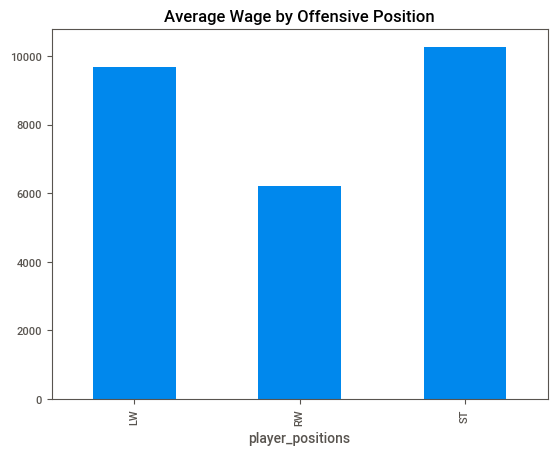

In [37]:
avg_wage.plot(kind ='bar', title = 'Average Wage by Offensive Position')
plt.show()

- The analysis shows that among offensive players, **Striker**(ST) tends to get paid the most, indicating that teams likely value this position more highly for its offensive contributions.

# Data Preprocessing

#### Handling with null values 

In [38]:
df.isnull().sum().sum()

244935

In [39]:
df.isnull().sum()[df.isnull().sum()>0].shape

(48,)

In [40]:
num_missing = df[num_cols1].isnull().sum()
num_missing[num_missing > 0]

release_clause_eur       1298
team_jersey_number        240
contract_valid_until      240
nation_jersey_number    17152
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
ls                       2036
st                       2036
rs                       2036
lw                       2036
lf                       2036
cf                       2036
rf                       2036
rw                       2036
lam                      2036
cam                      2036
ram                      2036
lm                       2036
lcm                      2036
cm                       2036
rcm                      2036
rm                       2036
lwb                      2036
ldm       

In [41]:
cat_missing = df[cat_cols1].isnull().sum()
cat_missing[cat_missing>0]

player_tags        16779
team_position        240
loaned_from        17230
joined              1288
nation_position    17152
player_traits      10712
dtype: int64

In [42]:
df.drop(['team_jersey_number','nation_jersey_number','player_tags','loaned_from','nation_position','player_traits'],axis = 1, inplace = True)

#### Replacing with Mean :

In [43]:
columns_mean = ['contract_valid_until']
for col in columns_mean:
    df[col].fillna(df[col].mean(),inplace = True)

##### Replacing with Median

In [44]:
columns_median = ['release_clause_eur']
for col in columns_median:
    df[col].fillna(df[col].median(),inplace = True)

- The median provides a representative value for skewed data

##### Replacing with Zero

In [45]:
columns_zero = ['pace','shooting','passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',
                'ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb','team_position','joined']
for col in columns_zero:
     df[col].fillna(0,inplace = True)

- Replacing with zero indicates a lack of skill for positional atrributes and clarifies the dataset

In [46]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [47]:
num_cols2 = df.select_dtypes(include=['float64','int64']).columns             #numerical columns
num_cols2

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'contract_valid_until', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_c

In [48]:
cat_cols2 = df.select_dtypes(include=['object']).columns
cat_cols2

Index(['nationality', 'club', 'player_positions', 'preferred_foot',
       'work_rate', 'body_type', 'real_face', 'team_position', 'joined'],
      dtype='object')

# Handling Outliers

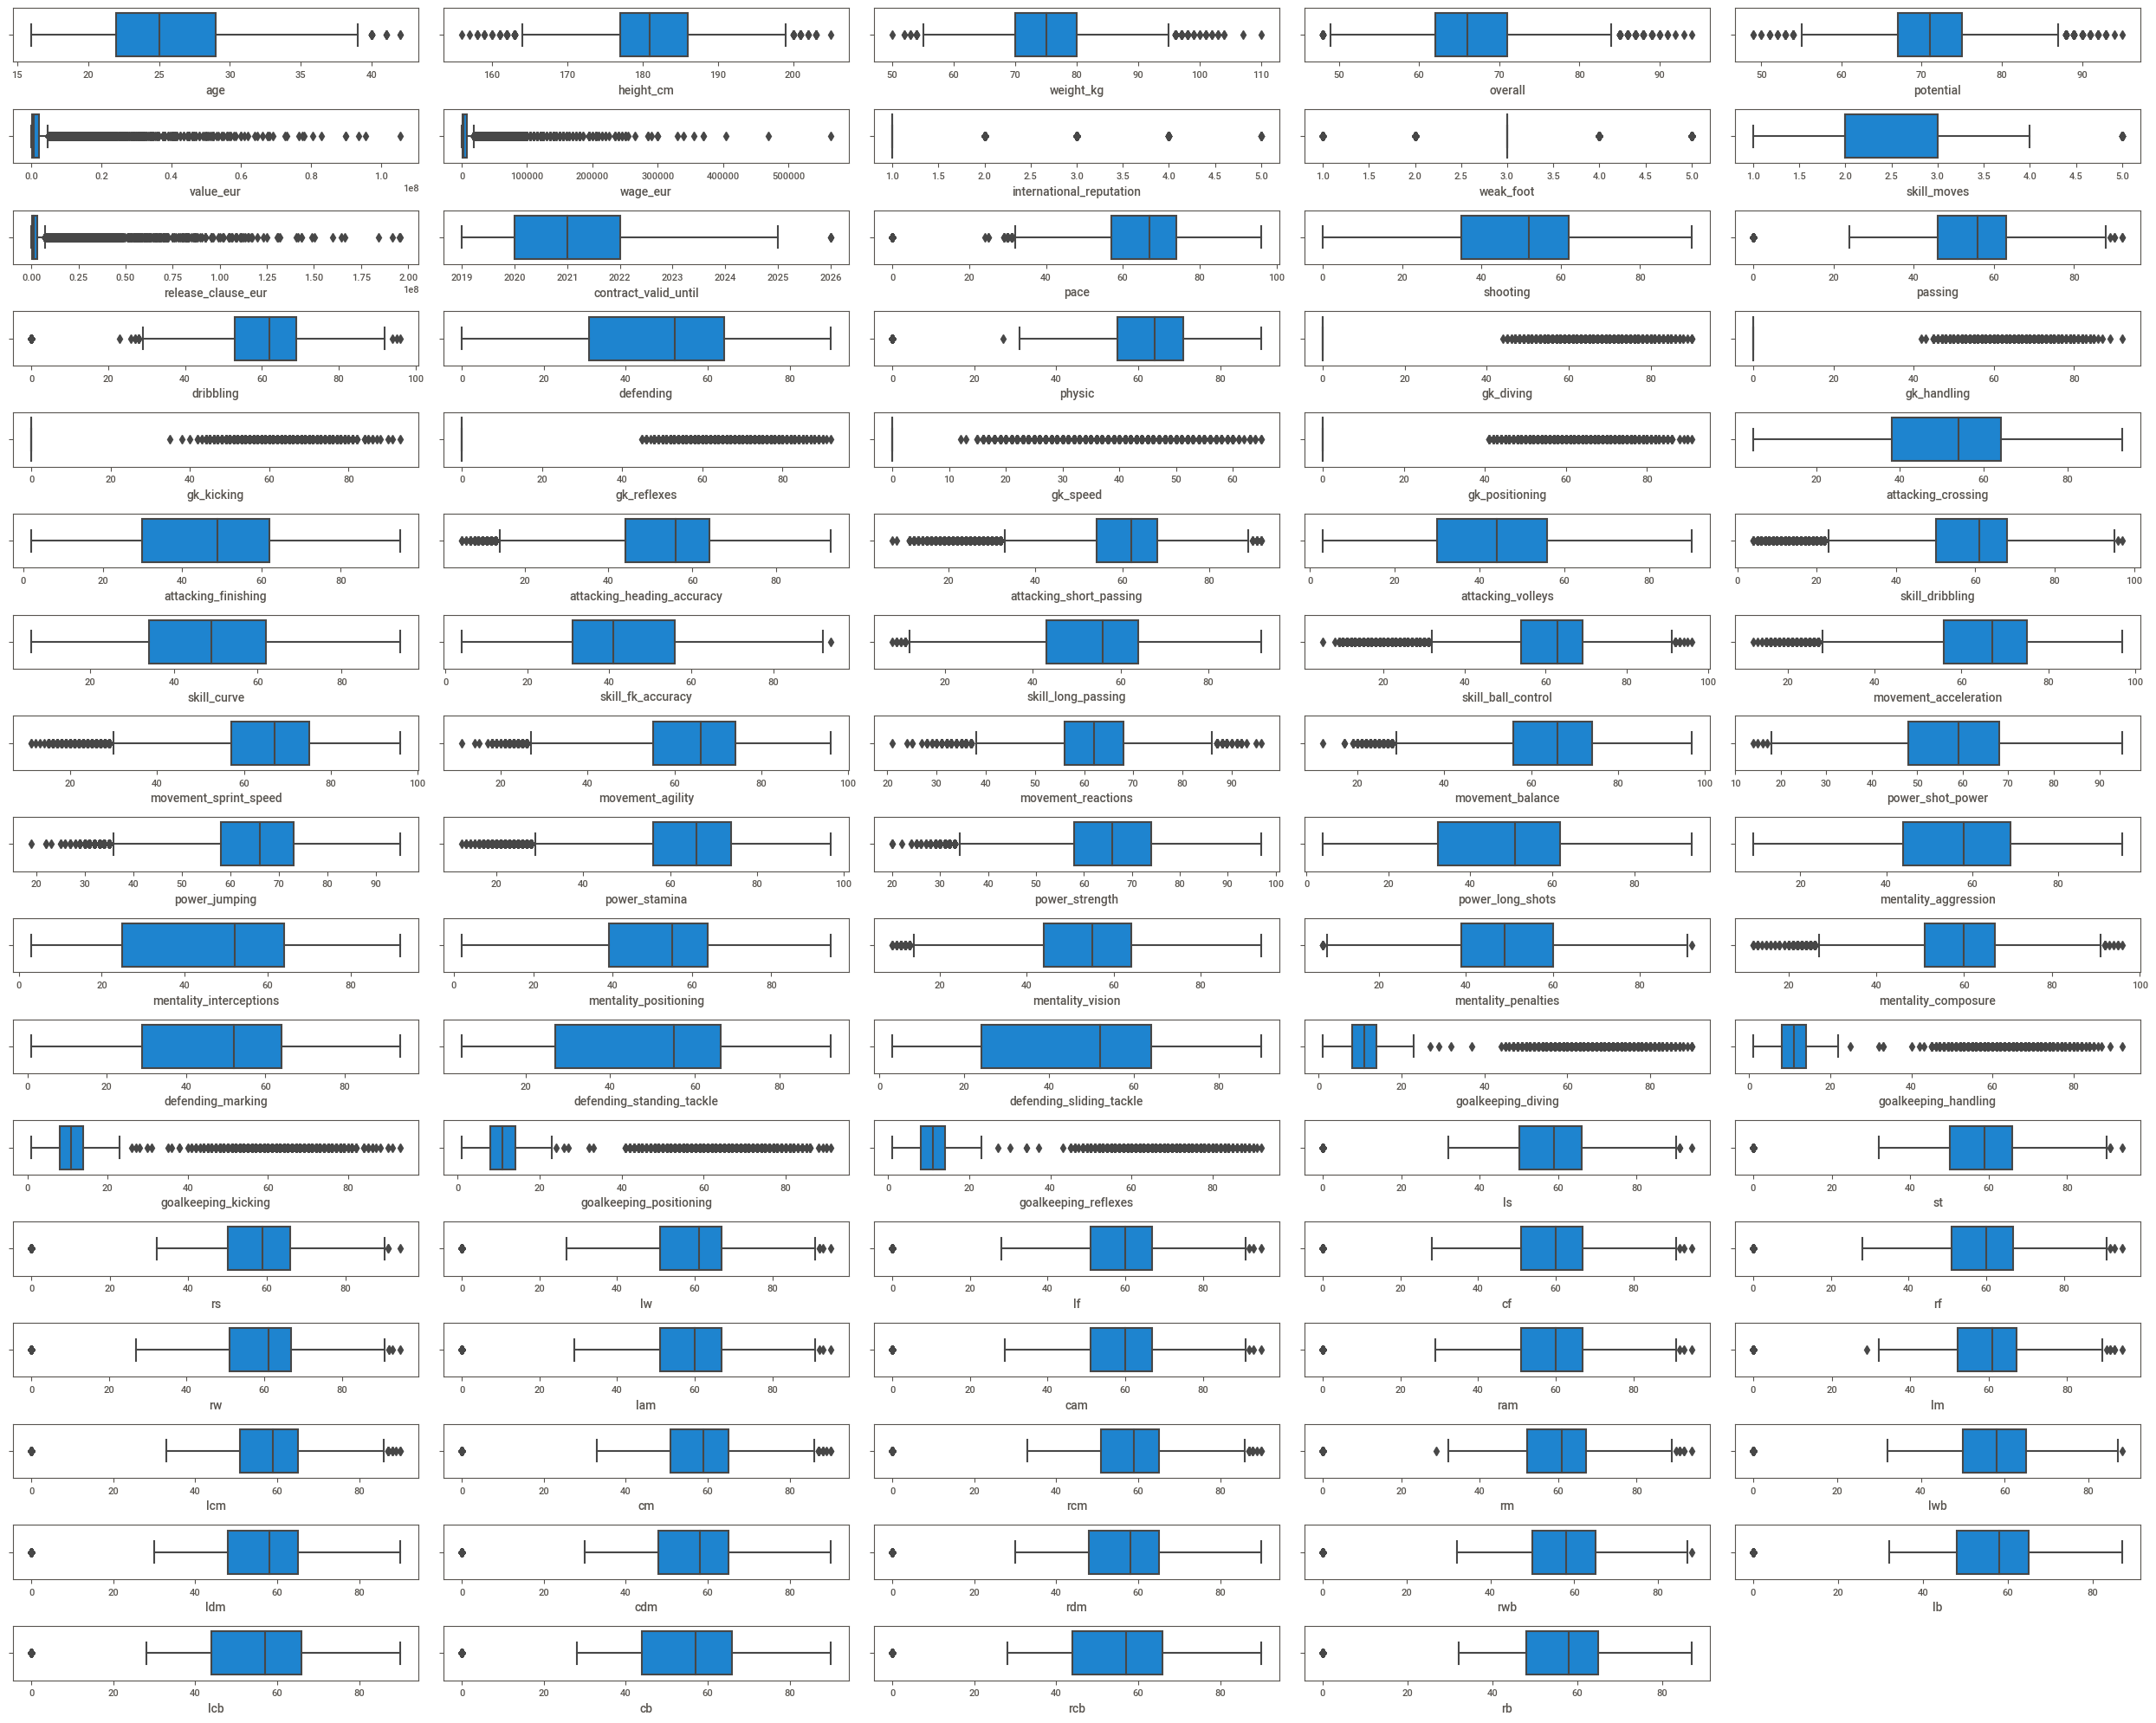

In [49]:
plt.figure(figsize=(25,20), facecolor='white')
index = 1
for i in num_cols2:
    plt.subplot(17,5,index)                             
    sns.boxplot(x = df[i])
    index += 1
plt.tight_layout()
plt.show()

- In this analysis, I opted to skip handling outliers due to the observed improvement in cluster separation and a silhouette score of 0.62 when including them. The outliers represent players with exceptional attributes, contributing to a richer understanding of player roles and play styles. Maintaining these data points enhances the model’s interpretability and provides valuable insights into niche player segments, ultimately supporting more informed decision-making in player analysis and strategy formulation.

# Conversion of Categorical data to Numerical data

In [50]:
print( cat_cols2)
print("- There are", cat_cols2.shape ,"categorical data")

Index(['nationality', 'club', 'player_positions', 'preferred_foot',
       'work_rate', 'body_type', 'real_face', 'team_position', 'joined'],
      dtype='object')
- There are (9,) categorical data


In [51]:
 df.nationality.value_counts()

nationality
England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
                       ... 
Liberia                   1
São Tomé & Príncipe       1
Puerto Rico               1
Bahrain                   1
Indonesia                 1
Name: count, Length: 162, dtype: int64

In [52]:
nationality_mapping = {country : idx for idx, country in enumerate(df.nationality.unique())}

In [53]:
df.nationality = df.nationality.map(nationality_mapping)

In [54]:
club_mapping = {club: idx for idx, club in enumerate(df.club.unique())}

In [55]:
df.club = df.club.map(club_mapping)

In [56]:
df.player_positions.value_counts()

player_positions
CB              2322
GK              2036
ST              1809
CM               786
CDM, CM          731
                ... 
LM, LWB, CM        1
CAM, CDM, CB       1
RM, LB             1
LB, CDM, LWB       1
RM, ST, CM         1
Name: count, Length: 643, dtype: int64

In [57]:
player_mapping = {position : idx for idx, position in enumerate(df.player_positions.unique())}

In [58]:
df.player_positions = df.player_positions.map(player_mapping)

In [59]:
df.preferred_foot.unique()

array(['Left', 'Right'], dtype=object)

In [60]:
df.preferred_foot.value_counts()

preferred_foot
Right    13960
Left      4318
Name: count, dtype: int64

In [61]:
df['preferred_foot'] = df['preferred_foot'].replace({'Left': 0, 'Right' : 1})

In [62]:
df.work_rate.unique()

array(['Medium/Low', 'High/Low', 'High/Medium', 'Medium/Medium',
       'High/High', 'Medium/High', 'Low/High', 'Low/Medium', 'Low/Low'],
      dtype=object)

In [63]:
df.work_rate.value_counts()

work_rate
Medium/Medium    9875
High/Medium      3216
Medium/High      1718
High/High         986
Medium/Low        886
High/Low          684
Low/Medium        461
Low/High          417
Low/Low            35
Name: count, dtype: int64

In [64]:
df.work_rate = df.work_rate.replace({'Medium/Low':1, 'High/Low':0, 'High/Medium':2, 'Medium/Medium':1,
       'High/High':3, 'Medium/High':2, 'Low/High':0, 'Low/Medium':0, 'Low/Low':0})

In [65]:
df.body_type.unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Normal', 'Lean',
       'PLAYER_BODY_TYPE_25', 'Stocky', 'Courtois', 'Shaqiri',
       'Akinfenwa'], dtype=object)

In [66]:
df.body_type.value_counts()

body_type
Normal                 10750
Lean                    6505
Stocky                  1016
Messi                      1
C. Ronaldo                 1
Neymar                     1
PLAYER_BODY_TYPE_25        1
Courtois                   1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

In [67]:
df.body_type = df.body_type.replace({'Messi':9, 'C. Ronaldo':8, 'Neymar':7, 'Normal':6, 'Lean':5,
       'PLAYER_BODY_TYPE_25':4, 'Stocky':3, 'Courtois':2, 'Shaqiri':1,
       'Akinfenwa':0})

In [68]:
df.real_face.unique()

array(['Yes', 'No'], dtype=object)

In [69]:
df.real_face.value_counts()

real_face
No     16310
Yes     1968
Name: count, dtype: int64

In [70]:
df.real_face = df.real_face.replace({'Yes': 1,'No' : 0})

In [71]:
df.team_position.unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', 0, 'RWB', 'LWB'],
      dtype=object)

In [72]:
df.team_position.value_counts()

team_position
SUB    7820
RES    2958
GK      662
LCB     660
RCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
0       240
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: count, dtype: int64

In [73]:
team_mapping = {team : idx for idx, team in enumerate(df.team_position.unique())}

In [74]:
df.team_position = df.team_position.map(team_mapping)

In [75]:
joined_mapping = {joined : idx for idx, joined in enumerate(df.joined.unique())}

In [76]:
df.joined = df.joined.map(joined_mapping)

# Scaling

In [77]:
scaler = StandardScaler()

In [78]:
df_scaled = scaler.fit_transform(df)

In [79]:
df = pd.DataFrame(df_scaled, columns = df.columns)

In [80]:
df

,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,1.442333,-1.681598,-0.464891,-1.024305,-1.663676,3.993662,3.657156,16.653625,26.019375,-0.620445,...,0.837146,0.758242,0.758242,0.758242,0.837146,0.624557,0.137041,0.137041,0.137041,0.624557
1,1.871809,0.834394,1.095935,-0.987495,-1.658738,3.849772,3.494276,10.029126,18.525626,-0.610735,...,0.739820,0.566184,0.566184,0.566184,0.739820,0.575939,0.231240,0.231240,0.231240,0.575939
2,0.368643,-0.941600,-1.032464,-0.950685,-1.653801,3.705883,3.331397,18.444030,13.139495,-0.601025,...,0.788483,0.566184,0.566184,0.566184,0.788483,0.575939,-0.098456,-0.098456,-0.098456,0.575939
3,0.153905,0.982394,1.663508,-0.913875,-1.648863,3.561993,3.494276,13.430896,5.411566,-0.591315,...,-2.569266,-2.506745,-2.506745,-2.506745,-2.569266,-2.535613,-2.406321,-2.406321,-2.406321,-2.535613
4,0.583381,-0.941600,-0.181104,-0.877065,-1.643925,3.561993,3.168517,15.668902,21.569962,-0.581605,...,0.788483,0.662213,0.662213,0.662213,0.788483,0.575939,0.042842,0.042842,0.042842,0.575939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,-0.705048,0.686395,0.528362,1.405148,-1.041532,-2.625268,-2.532272,-0.437582,-0.349253,-0.562184,...,-0.379429,-0.394106,-0.394106,-0.394106,-0.379429,-0.250567,-0.145555,-0.145555,-0.145555,-0.250567
18274,-0.705048,-0.645601,-1.316251,1.405148,-1.451357,-2.625268,-2.532272,-0.437582,-0.349253,-0.562184,...,-0.330766,-0.346092,-0.346092,-0.346092,-0.330766,-0.201949,-0.098456,-0.098456,-0.098456,-0.201949
18275,-1.349262,0.686395,-0.039211,1.405148,-1.150160,-2.625268,-2.532272,-0.437582,-0.396089,-0.552474,...,-0.184777,-0.058005,-0.058005,-0.058005,-0.184777,-0.153331,-0.004257,-0.004257,-0.004257,-0.153331
18276,-1.564000,0.538395,-0.181104,1.405148,-1.322978,-2.625268,-2.858031,-0.437582,-0.396089,-0.552474,...,-0.136114,-0.106019,-0.106019,-0.106019,-0.136114,-0.104713,-0.004257,-0.004257,-0.004257,-0.104713


# Balancing

- No Class Labels : Since there are no class labels to balance against, there's no straightforward way to apply these methods

- Focus on Structure: The aim is to understand the structure of the data rather than to fit it to a target outcome.

# Feature Selection

In [81]:
corr_matrix = df.corr().abs()

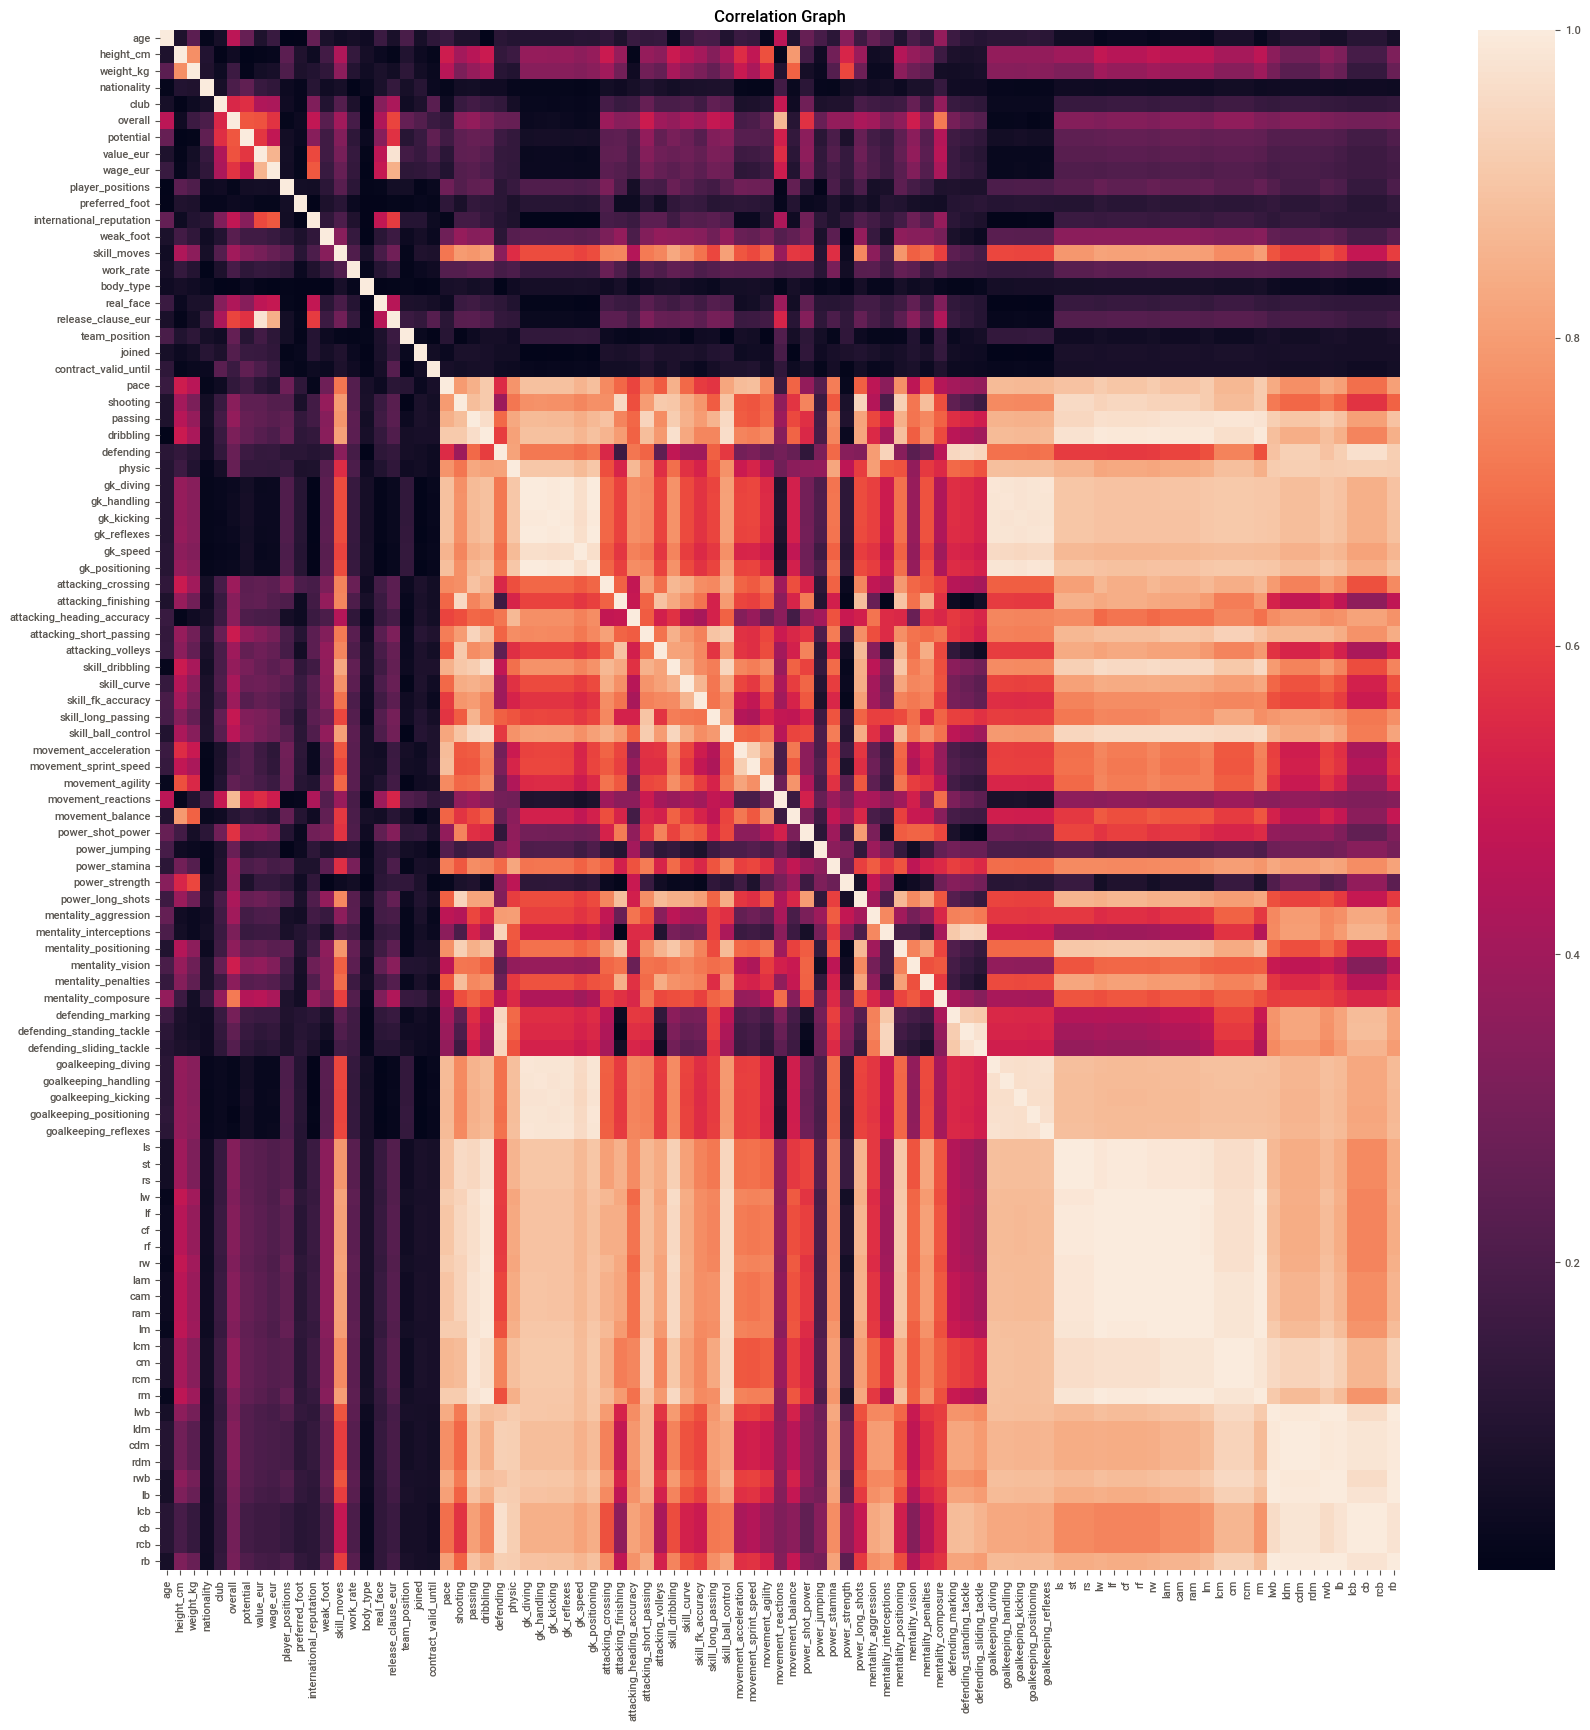

In [82]:
plt.figure(figsize =(20,20))
sns.heatmap(corr_matrix, annot = False)
plt.title('Correlation Graph')
plt.show()

- Through the heatmap visualization, we observe that several columns are highly correlated. To address this redundancy and simplify our analysis, we will apply **PCA** to reduce the dimesionaity and retain the most significant components.

# Dimensionality Reduction

In [83]:
pca = PCA()

In [84]:
pca = PCA(n_components = 0.95)

In [85]:
pca.fit(df)

PCA(n_components=0.95)

In [86]:
df_pca = pca.transform(df)

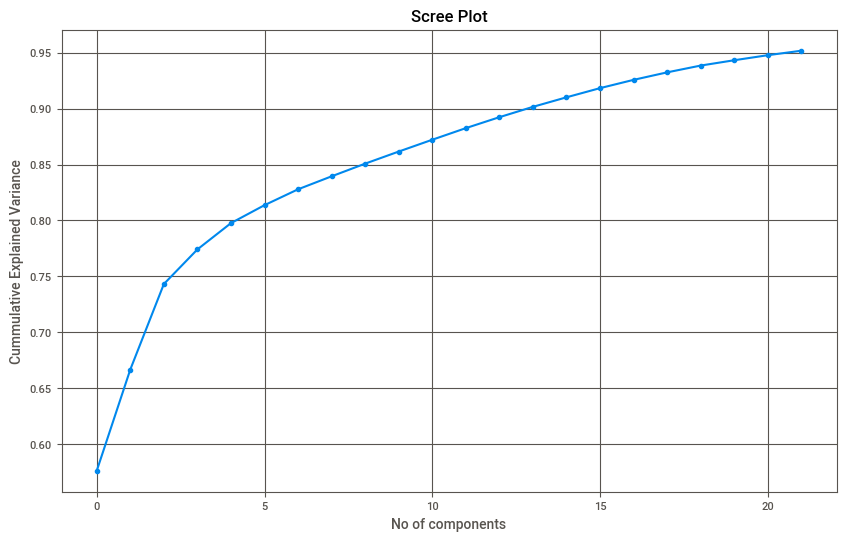

In [87]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker = 'o')
plt.title('Scree Plot')
plt.xlabel('No of components')
plt.ylabel('Cummulative Explained Variance')
plt.grid()
plt.show()


In [88]:
print(f"Number of components to retain 95% varaince: {pca.n_components_}")

Number of components to retain 95% varaince: 22


In [89]:
pca = PCA(n_components = 22)

In [90]:
new_data = pca.fit_transform(df)

In [91]:
df = pd.DataFrame(data = new_data, columns = [f'PC{i+1}' for i in range(22)])

In [92]:
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,-13.714414,15.576037,20.774794,-6.361861,15.589443,2.037515,15.185840,7.666437,-1.316266,-2.651197,...,3.660318,-0.860510,2.064200,-0.689138,8.313654,4.820560,1.074352,-2.213897,-2.374179,2.846854
1,-12.111484,12.125955,15.986565,-0.510913,10.508550,-0.602453,9.941395,4.275165,-1.916651,-1.560089,...,1.470076,1.039798,1.592237,-0.493268,4.345620,1.720900,0.241722,1.683693,0.440451,1.183626
2,-12.464680,15.040679,17.081151,-5.975175,13.908726,1.274878,11.730432,4.580410,-2.198298,-1.899272,...,3.622281,-0.785986,1.608960,-0.031978,6.621484,3.212149,1.214756,-1.280357,-1.301753,1.280560
3,17.704823,8.817724,17.896768,-5.809798,8.829544,-2.154352,5.162917,2.641387,-0.691226,-0.155227,...,2.051057,0.646999,0.836208,-0.695790,4.521882,2.391278,-1.240083,-3.107793,-1.160934,0.571600
4,-12.386661,14.229285,17.843379,-5.884942,15.104606,0.979268,11.945987,4.474038,-0.757369,-0.915795,...,4.461811,-0.800843,2.812693,-1.376786,7.344582,2.915841,1.162630,-2.650361,-2.802885,2.834899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,5.376660,-4.338324,-3.426280,-0.455889,1.747300,-0.338669,2.410313,-0.716500,-0.096551,-1.549630,...,0.469075,-1.337477,-0.790084,0.546913,-0.508177,0.603622,1.121016,1.054642,-1.312664,1.676491
18274,4.924074,-4.001672,-3.756552,-1.987680,1.837627,0.293124,2.053837,-1.143961,-0.069670,0.458443,...,0.986620,-0.430021,0.782339,-0.590573,-1.025758,0.643459,0.806514,1.157282,-1.426390,1.568079
18275,2.772525,-3.134238,-2.973149,0.277210,1.281117,1.789663,1.618398,-0.277818,0.104915,0.823924,...,0.516444,0.653346,-1.532484,-0.900435,-0.069033,0.472826,0.183652,0.685720,-0.828809,1.655070
18276,2.565506,-2.720680,-2.890296,-0.192536,1.476484,1.556542,0.964254,-1.124829,0.667163,1.201665,...,0.889824,0.856452,0.039803,-0.823241,0.059923,-0.209840,-0.206900,1.002877,-0.640929,1.790201


- let's visualize only two features first to understand variance :

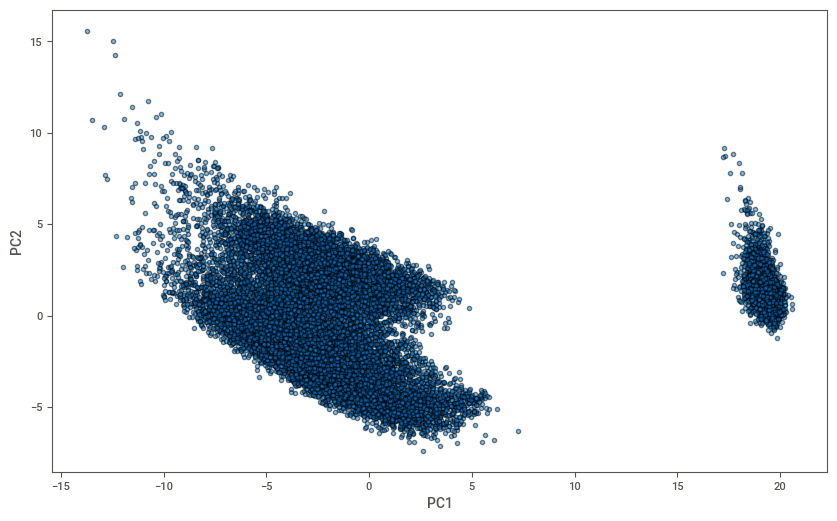

In [93]:
plt.figure(figsize=(10,6))
plt.scatter(df['PC1'],df['PC2'],alpha = 0.5, edgecolor = 'k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- The wide separation of points in the PC1 vs PC2 plot suggests that the data has distinct groupings or clusters, making it suitable for applying K-Means clustering. The distance between points indicates potential differences in patterns among the data points, which K-Means can leverage to identify meaningful clusters."

# Model Creation

In [94]:
WCSS = []

for i in range(1,11):
    model1 = KMeans(n_clusters=i, random_state=42)
    model1.fit(df)
    WCSS.append(model1.inertia_)

In [95]:
WCSS

[1617958.0121831826,
 761674.5239562215,
 617543.031570601,
 536367.8966809441,
 493732.70831997786,
 464378.4445915022,
 444556.3385625258,
 427242.47440105263,
 413278.22592389147,
 401246.84115258435]

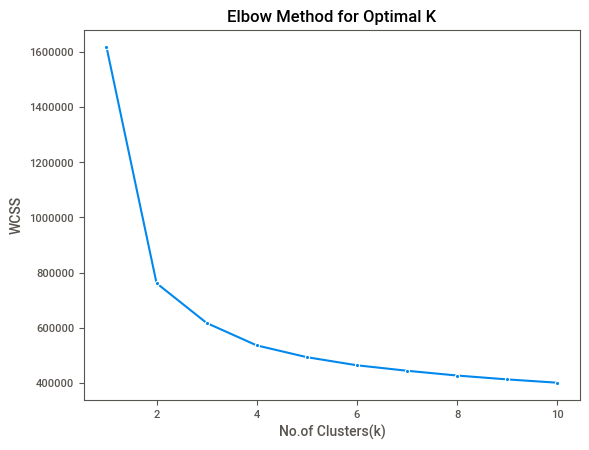

In [96]:
sns.lineplot(x = range(1,11), y = WCSS,marker = 'o')
plt.xlabel('No.of Clusters(k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

- Based on the elbow method, the optimal number of clusters is 2

In [97]:
model = KMeans(n_clusters = 2)

In [98]:
clusters = model.fit_predict(df)
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
 model.cluster_centers_

array([[-2.40308302e+00, -2.02336096e-01, -2.21591157e-01,
         5.00898413e-02,  6.70257429e-02, -1.12588452e-03,
         1.59102401e-02,  7.60382978e-03, -6.70797593e-03,
         6.54291164e-03, -5.07069286e-03, -2.09899354e-03,
         2.46777693e-03,  5.01822190e-03,  3.02835539e-03,
         4.32890805e-03, -8.16219005e-03, -4.88839565e-04,
         1.19710478e-02, -8.92426360e-04,  1.90051942e-03,
        -2.49919389e-04],
       [ 1.91703706e+01,  1.61411732e+00,  1.76772278e+00,
        -3.99587035e-01, -5.34691609e-01,  8.98163868e-03,
        -1.26922455e-01, -6.06588425e-02,  5.35122520e-02,
        -5.21954670e-02,  4.04509791e-02,  1.67445251e-02,
        -1.96864602e-02, -4.00323969e-02, -2.41584225e-02,
        -3.45334600e-02,  6.51131094e-02,  3.89967201e-03,
        -9.54979166e-02,  7.11924800e-03, -1.51612163e-02,
         1.99370861e-03]])

In [100]:
model.inertia_

761674.5239562215

# Model Evaluation

- In this section, we evaluate the performance of our K-Means clustering model using the silhouette score,which helps us assess  the quality of the clusters formed

In [101]:
label = model.labels_

In [102]:
ss = silhouette_score(df,label)
ss

0.6222183440527644

- **Score Range**: The silhouette score ranges from -1 to 1.
- **Close to 1**: Points are well-clustered, indicating distinct clusters.
- **Close to 0**: Points are on the boundary of clusters, suggesting some overlap.
- **Less than 0**: Points are likely assigned to the wrong cluster.

- In our case, a score of 0.622 indicates that the clusters are reasonably well-defined, with points in each cluster being similar to one another while remaining distinct from points in other clusters.

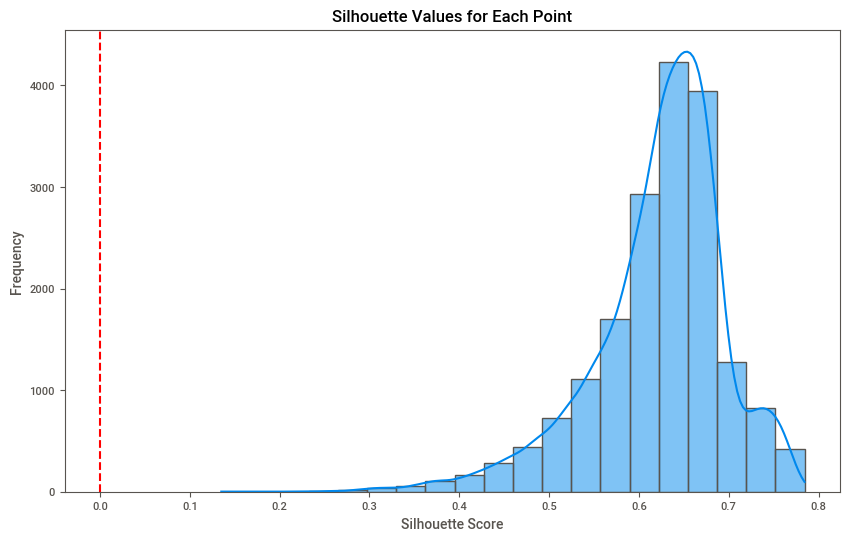

In [103]:
silhouette_vals = silhouette_samples(df, clusters)

plt.figure(figsize=(10, 6))
sns.histplot(silhouette_vals, bins=20, kde=True)
plt.title('Silhouette Values for Each Point')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

This histogram shows the distribution of silhouette scores for all points. A higher frequency of scores close to 1 indicates that most points are well-clustered, while scores around 0 suggest points that are near the decision boundary

- The silhouette score confirms that our clustering approach is effective, providing a solid foundation for any futher analysis based on these clusters

###### Exploring additional cluster sizes like 3,4,5

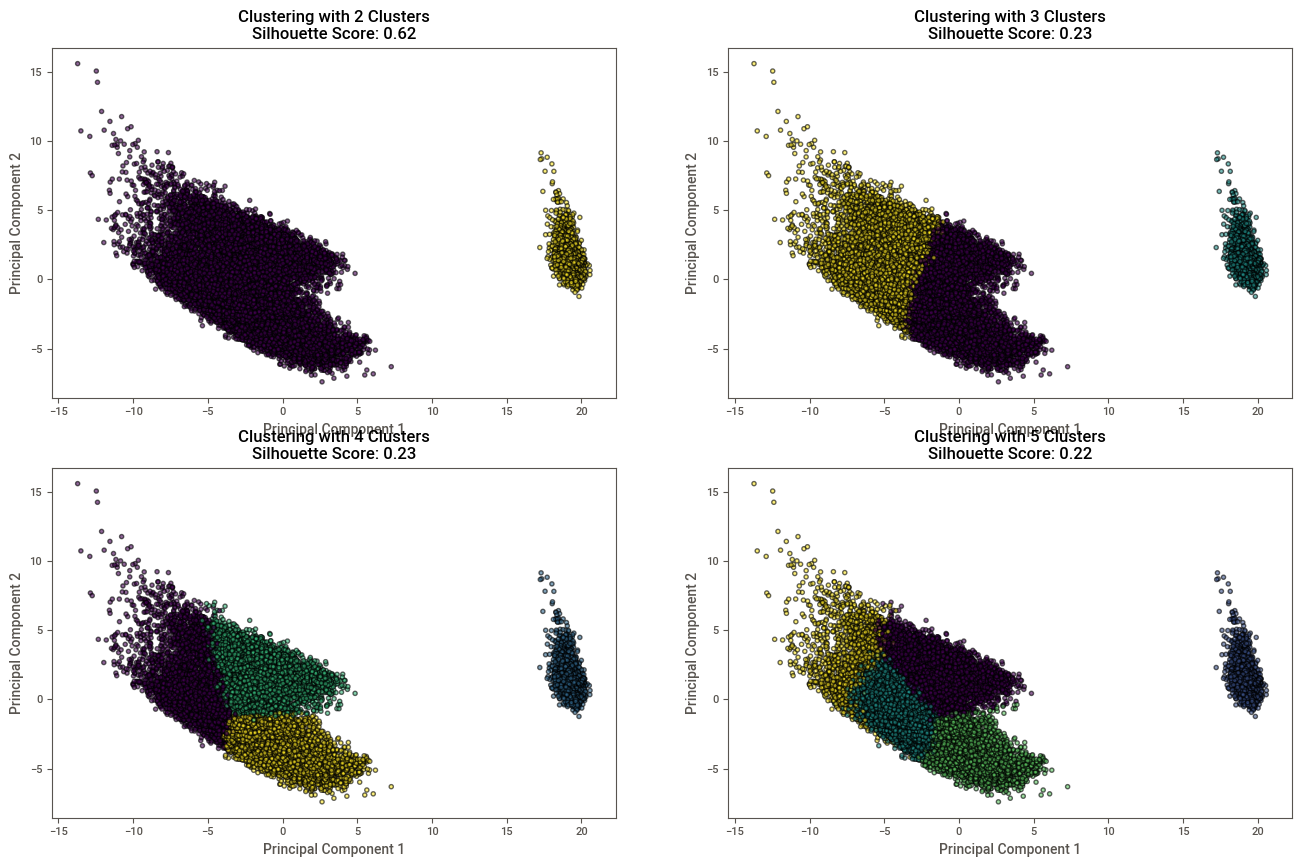

Silhouette Score for 2 Clusters: 0.62
Silhouette Score for 3 Clusters: 0.23
Silhouette Score for 4 Clusters: 0.23
Silhouette Score for 5 Clusters: 0.22
Best number of clusters: 2 with Silhouette Score: 0.62


<Figure size 640x480 with 0 Axes>

In [104]:
silhouette_scores1 = []

# Range of clusters to try
cluster_range1 = [2, 3, 4, 5]

plt.figure(figsize=(16, 10))

for i, k in enumerate(cluster_range1, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters1 = kmeans.fit_predict(df)
    
    score1 = silhouette_score(df, clusters1)
    silhouette_scores1.append(score1)
    plt.subplot(2, 2, i)
    plt.scatter(df['PC1'], df['PC2'], c=clusters1, cmap='viridis', alpha=0.6, edgecolor='k')
    plt.title(f'Clustering with {k} Clusters\nSilhouette Score: {score1:.2f}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    
plt.show()

# Displays the silhouette scores for each cluster size
for i, k in enumerate(cluster_range1):
    print(f"Silhouette Score for {k} Clusters: {silhouette_scores1[i]:.2f}")


# Finds the best number of clusters based on silhouette score
best_cluster_index1 = silhouette_scores1.index(max(silhouette_scores1))
best_cluster1 = cluster_range1[best_cluster_index1]
print(f"Best number of clusters: {best_cluster1} with Silhouette Score: {max(silhouette_scores1):.2f}")


plt.tight_layout()


- The analysis of silhouette scores indicates that **2 clusters** achieve a high silhouette score of 0.62, demonstrating well-defined separation and cohesion among the clusters. Conversely, increasing the number of clusters to 3, 4, or 5 leads to a drop in silhouette scores to *0.23* and *0.21*, signifying a loss of clarity and distinctiveness within those clusters. This suggests that while more clusters may seem appealing, they result in greater overlap and less meaningful differentiation among the data points.



- Hence we can conclude that **2** clusters is the best option for our data.

# PROJECT CONCLUSION

###### Introduction

This project focused on analyzing the FIFA 20 dataset, comprising 18,278 rows and 104 columns, to extract meaningful insights through unsupervised learning techniques. The aim was to cluster players based on their attributes, enabling data-driven decisions in player management and strategy formulation.

###### Objective :

The goal of this project is to use K-Means clustering to group players in FIFA20 based on attributes such as pace, shooting, dribbling, defending, and physicality. This clustering will provide insights into player types and help users make more informed decisions about team composition and strategy.

###### Model Implementation :

- **Data Preprocessing**: The dataset was cleaned by addressing null values and standardizing feature scales to ensure uniform contribution to the analysis.    
- **PCA Application**: PCA reduced the dataset to 23 principal components, preserving significant variance while simplifying the dataset's structure.    
- **K-Means Clustering**: Using the elbow method, we identified k = 2 as the optimal number of clusters. K-Means was then applied to group players effectively.   
- **Model Evaluation**: A silhouette score of 0.62 was achieved, indicating a moderate level of separation between the identified clusters, which suggests a reasonable effectiveness of the clustering approach.   

###### Key Insights :

- The analysis of the FIFA 20 dataset revealed two distinct clusters of players, each representing different performance attributes and styles of play. The silhouette score of 0.62 indicates a moderate level of separation between these clusters, suggesting that the K-Means clustering effectively captured the underlying structure of the data. These insights can be leveraged for strategic decision-making in player management, including targeted recruitment and performance evaluation. Moreover, the clustering results offer a foundation for further analysis, enabling deeper insights into player dynamics and potential team strategies.